In [1]:
import pandas as pd
import numpy as np

In [2]:
X_train = catalog.load("X_train")
X_test = catalog.load("X_test")
y_train = catalog.load("y_train")
y_test = catalog.load("y_test")
CT = catalog.load("CT")

[11/26/23 13:27:12] INFO     Loading data from 'X_train' (CSVDataSet)...                        ]8;id=698721;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=759480;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'X_test' (CSVDataSet)...                         ]8;id=391572;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=952786;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'y_train' (CSVDataSet)...                        ]8;id=833433;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=293271;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'y_test' (CSVDataSet)...                         ]8;id=755072;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=229563;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

                    INFO     Loading data from 'CT' (PickleDataSet)...                          ]8;id=643864;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py\data_catalog.py]8;;\:]8;id=288059;file:///home/ricardormotta/projects/LTV_analysis/venv/lib/python3.10/site-packages/kedro/io/data_catalog.py#502\502]8;;\

In [3]:
from sklearn.cluster import KMeans

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

from sklearn.model_selection import KFold
import numpy as np

def plot_elbow_kfold(data, CT, max_clusters=10, n_splits=5):
    kf = KFold(n_splits=n_splits, shuffle=True)
    inertias = []
    data = CT.fit_transform(data)
    for k in range(1, max_clusters + 1):
        fold_inertias = []
        print(f"running k={k}")
        for train_index, _ in kf.split(data):
            kmeans = KMeans(n_clusters=k)
            kmeans.fit(data[train_index])
            fold_inertias.append(kmeans.inertia_)

        inertias.append(np.mean(fold_inertias))

    # Plotting the elbow plot
    sns.set(style="whitegrid")
    plt.figure(figsize=(8, 6))
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Average Within-Cluster Sum of Squares (Inertia)')
    plt.title('Elbow Method using K-Fold Cross Validation')
    plt.xticks(np.arange(1, max_clusters + 1))
    plt.show()

In [5]:
X_train

,product,channel,age_bucket,operating_system,days_to_churn,product_x,product_y,is_xs
0,product_a,channel_b,45-49,Android,730.0,0.0,0.0,0
1,product_a,channel_b,25-29,iOS,449.0,0.0,0.0,0
2,product_a,channel_b,25-29,Android,226.0,0.0,0.0,0
3,product_a,channel_a,30-34,iOS,2020.0,0.0,0.0,0
4,product_a,channel_b,25-29,iOS,1461.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...
82093,product_a,channel_b,25-29,iOS,327.0,0.0,0.0,0
82094,product_a,channel_b,18-24,Android,791.0,0.0,0.0,0
82095,product_a,channel_a,25-29,iOS,507.0,0.0,0.0,0
82096,product_a,channel_b,35-39,iOS,1339.0,0.0,0.0,0


In [6]:
import warnings
warnings.filterwarnings("ignore")

running k=1
running k=2
running k=3
running k=4
running k=5
running k=6
running k=7
running k=8
running k=9
running k=10


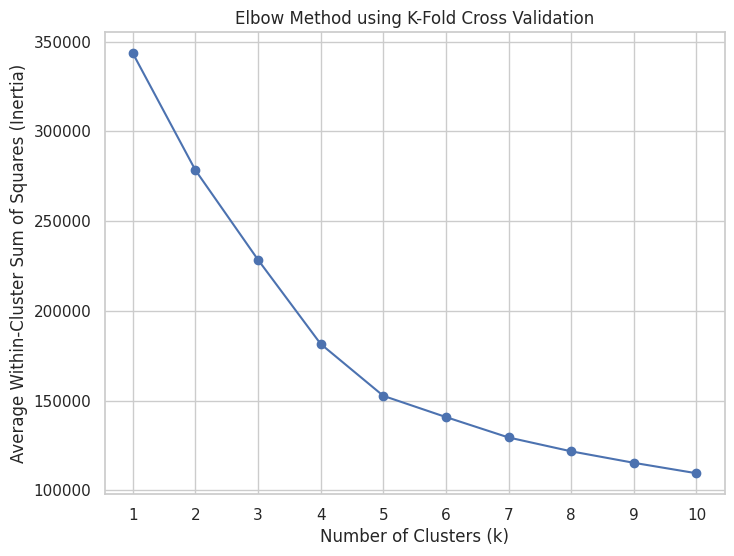

In [7]:
plot_elbow_kfold(X_train, CT, max_clusters=10, n_splits=5)

## Procceeding with k=6

In [9]:
k=6
n_splits=5
kf = KFold(n_splits=n_splits, shuffle=True)
kmeans = KMeans(n_clusters=k)
pipe = Pipeline([("CT", CT), ("model", kmeans)])
pipe.fit(X_train)


Pipeline(steps=[('CT',
                 ColumnTransformer(transformers=[('categorical',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['product', 'channel',
                                                   'age_bucket',
                                                   'operating_system']),
                                                 ('numerical', StandardScaler(),
                                                  ['days_to_churn', 'product_x',
                                                   'product_y'])])),
                ('model', KMeans(n_clusters=6))])

In [10]:
pipe.predict(X_test)

array([5, 5, 1, ..., 5, 1, 5], dtype=int32)

In [11]:
len(np.unique(pipe["model"].labels_))

6

In [12]:
centroids = pipe["model"].cluster_centers_

In [13]:
centroids


array([[ 9.28850763e-01,  1.12905261e-02,  5.98587107e-02,
         1.00000000e+00,  1.66533454e-15,  6.07417686e-02,
         1.38009335e-01,  1.60085783e-01,  1.09814558e-01,
         1.00731677e-01,  8.53412388e-02,  1.04263908e-01,
         2.40822505e-01,  1.89226694e-04,  4.72120600e-01,
         4.88267945e-01,  3.96114545e-02,  8.82955951e-01,
        -3.08477369e-02, -9.66290973e-02],
       [ 6.79914389e-01,  8.68949621e-02,  2.33190649e-01,
        -2.39808173e-14,  1.00000000e+00,  1.32301613e-01,
         2.58840961e-01,  2.28679618e-01,  1.42838327e-01,
         8.82449786e-02,  5.29140599e-02,  3.78004610e-02,
         5.77214356e-02,  6.58544616e-04,  4.59861706e-01,
         4.62495884e-01,  7.76424103e-02, -6.06997952e-01,
        -3.08477369e-02, -9.66290973e-02],
       [ 7.52380952e-01,  2.14285714e-02,  2.26190476e-01,
         2.75000000e-01,  7.25000000e-01,  1.47619048e-01,
         3.21428571e-01,  3.02380952e-01,  1.29761905e-01,
         6.42857143e-02,  2.

In [29]:
def top_cluster_features(data, _pipe, top_n=3):  
    # Assign cluster labels to each data point
    labels = _pipe["model"].labels_
    k = len(np.unique(labels))
    data['Cluster'] = labels
    data = _pipe["CT"].transform(data)

    # Calculate centroids for each cluster
    centroids = _pipe["model"].cluster_centers_
    
    # Get feature importances for each cluster
    cluster_features = {}
    for cluster in range(k):
        centroid = centroids[cluster]
        abs_centroid = np.abs(centroid)  # Take absolute values for importance
        
        # Sort indices by importance and get top_n
        top_indices = np.argsort(abs_centroid)[::-1][:top_n]
        
        # Get feature names and importance values
        feature_names = _pipe[0].get_feature_names_out()[top_indices]
        feature_importance = centroid[top_indices]
        
        cluster_features[f'Cluster {cluster}'] = pd.DataFrame({'Features': feature_names, 'Importance': feature_importance})
    
    return cluster_features

In [30]:
top_cluster_features(X_train, pipe)


{
    'Cluster 0':                          Features  Importance
0  categorical__channel_channel_a    1.000000
1  categorical__product_product_a    0.928851
2        numerical__days_to_churn    0.882956,
    'Cluster 1':                          Features  Importance
0  categorical__channel_channel_b    1.000000
1  categorical__product_product_a    0.679914
2        numerical__days_to_churn   -0.606998,
    'Cluster 2':                          Features  Importance
0            numerical__product_y    9.153161
1  categorical__product_product_a    0.752381
2  categorical__channel_channel_b    0.725000,
    'Cluster 3':                          Features  Importance
0            numerical__product_x   32.026589
1            numerical__product_y    1.969594
2  categorical__product_product_a    0.797468,
    'Cluster 4':                          Features  Importance
0        numerical__days_to_churn    1.327859
1  categorical__channel_channel_b    0.999928
2  categorical__product_product_a 

In [31]:
X_train.drop("product_x")

,product,channel,age_bucket,operating_system,days_to_churn,product_x,product_y,is_xs,Cluster
0,product_a,channel_b,45-49,Android,730.0,0.0,0.0,0,1
1,product_a,channel_b,25-29,iOS,449.0,0.0,0.0,0,1
2,product_a,channel_b,25-29,Android,226.0,0.0,0.0,0,1
3,product_a,channel_a,30-34,iOS,2020.0,0.0,0.0,0,0
4,product_a,channel_b,25-29,iOS,1461.0,0.0,0.0,0,4
...,...,...,...,...,...,...,...,...,...
82093,product_a,channel_b,25-29,iOS,327.0,0.0,0.0,0,1
82094,product_a,channel_b,18-24,Android,791.0,0.0,0.0,0,1
82095,product_a,channel_a,25-29,iOS,507.0,0.0,0.0,0,5
82096,product_a,channel_b,35-39,iOS,1339.0,0.0,0.0,0,4



array(['categorical__product_product_a', 'categorical__product_product_b',
       'categorical__product_product_c', 'categorical__channel_channel_a',
       'categorical__channel_channel_b', 'categorical__age_bucket_18-24',
       'categorical__age_bucket_25-29', 'categorical__age_bucket_30-34',
       'categorical__age_bucket_35-39', 'categorical__age_bucket_40-44',
       'categorical__age_bucket_45-49', 'categorical__age_bucket_50-54',
       'categorical__age_bucket_55+', 'categorical__age_bucket_undefined',
       'categorical__operating_system_Android',
       'categorical__operating_system_iOS',
       'categorical__operating_system_nan', 'numerical__days_to_churn',
       'numerical__product_x', 'numerical__product_y'], dtype=object)